In [1]:
from __future__ import division
import math, sys
import numpy as np
import numpy.random as rd
import scipy.stats as st
import pandas as pd
from sklearn import datasets
from scipy.misc import comb as comb

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

sns.set(style="whitegrid", palette="muted", color_codes=True)

In [3]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets

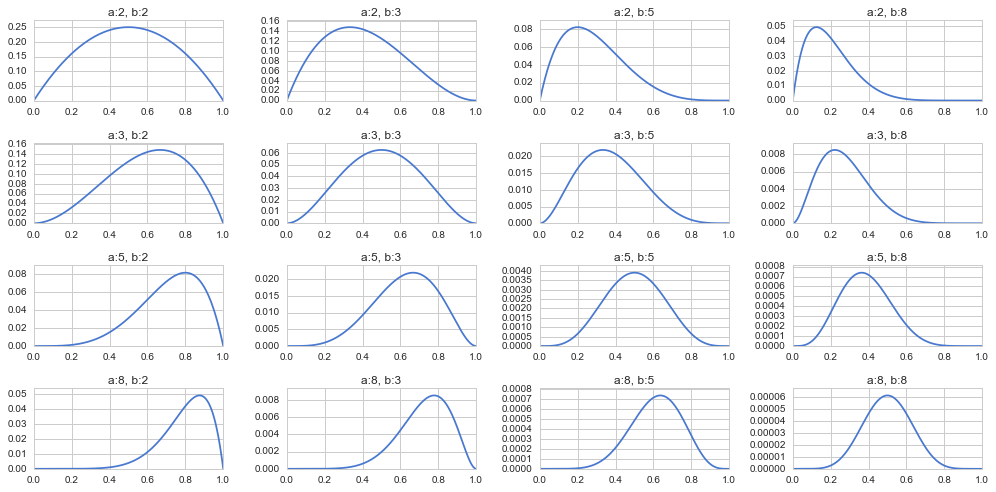

In [4]:
p = np.linspace(0, 1, 301)

i = 1
plt.figure(figsize=(14,7))
for a in [2,3,5,8]:
    for b in [2,3,5,8]:
        
        f = p**(a-1.) * (1-p)**(b-1.)
        plt.subplot(4, 4, i)
        plt.plot(p, f, c="b")
        plt.title("a:{}, b:{}".format(a, b))
        
        ymax = np.max(f)
        plt.ylim(0, ymax*1.1)
        
        i += 1

plt.tight_layout()
plt.show()

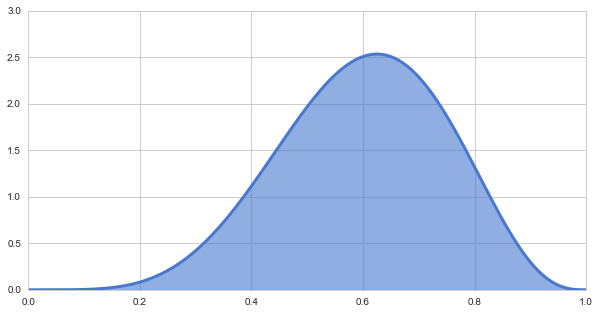

In [5]:
a=6
b=4
set_size = a+b-1
trial_size = 30000
bin_width = 51
plt.figure(figsize=(10,5))
plt.plot(p, st.beta.pdf(p, a, b), c="b", lw=3)
plt.fill_between(p, st.beta.pdf(p, a, b), alpha=0.6)
plt.show()

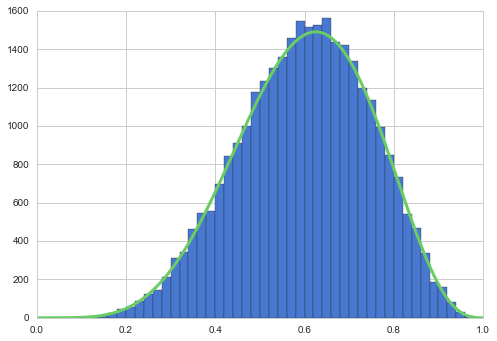

In [6]:
set_size = a+b-1
trial_size = 30000
bin_width = 51

def gen_orderd_unif(size):
    unif = rd.rand(size)
    unif.sort()
    return unif

plt.hist([gen_orderd_unif(set_size)[a-1] for _ in xrange(trial_size)], bins=np.linspace(0,1,bin_width))

plt.plot(p, st.beta.pdf(p, a, b)*trial_size/bin_width, c="g", lw=3)
plt.show()

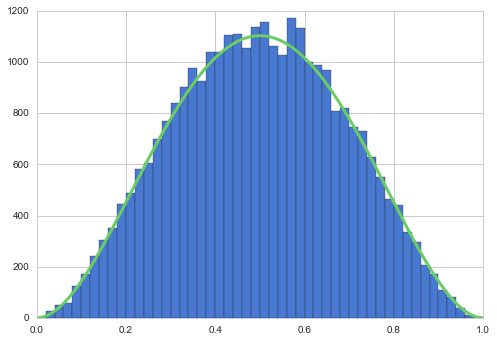

In [7]:
@interact(a=(1,15,1), b=(1, 15,1))
def draw_norm_dist(a=2, b=2): 
    set_size = a+b-1
    trial_size = 30000
    bin_width = 51

    def gen_orderd_unif(size):
        unif = rd.rand(size)   #  (0, 1)の一様分布に従う乱数をsize個生成
        unif.sort()                   # 大きさの順に並べる
        return unif

    # a+b-1個の順番に並べた一様乱数を生成、それをtrial_sizeセット実施して各セットa番目を抜き出す
    result = [gen_orderd_unif(set_size)[a-1] for _ in np.arange(trial_size)]
    plt.hist(result, bins=np.linspace(0,1,bin_width))     # 結果をヒストグラムで表示
    plt.plot(p, st.beta.pdf(p, a, b)*trial_size/bin_width, c="g", lw=3)  # ベータ分布の密度関数を表示
    plt.show()

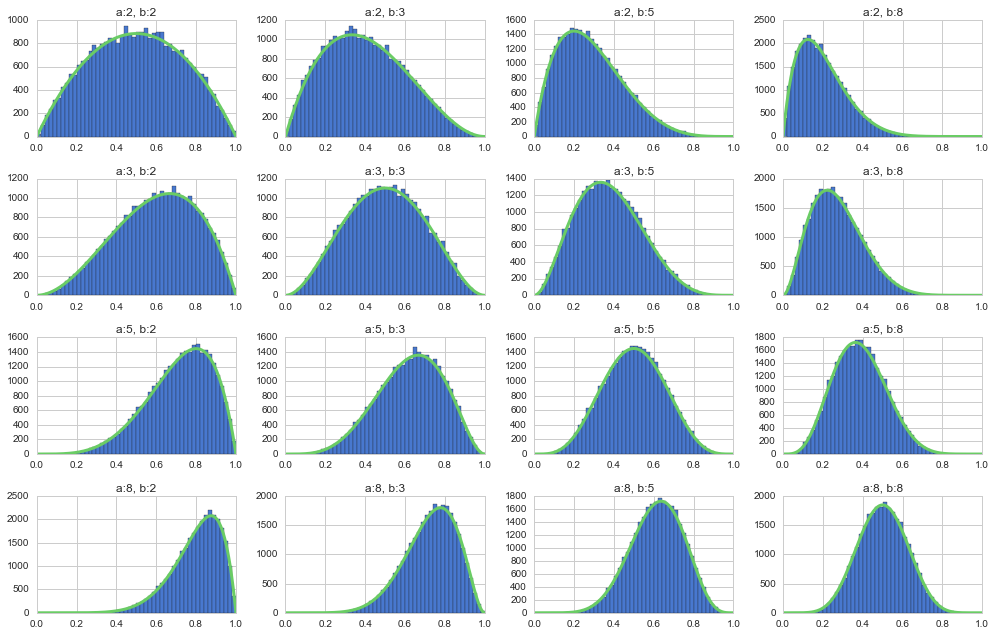

In [8]:
p = np.linspace(0, 1, 301)
def gen_orderd_unif(size):
    unif = rd.rand(size)   #  (0, 1)の一様分布に従う乱数をsize個生成
    unif.sort()                   # 大きさの順に並べる
    return unif

trial_size = 30000
bin_width = 51
i = 1

plt.figure(figsize=(14,9))
for a in [2,3,5,8]:
    for b in [2,3,5,8]:
        
        plt.subplot(4, 4, i)
        
        set_size = a+b-1
        # a+b-1個の順番に並べた一様乱数を生成、それをtrial_sizeセット実施して各セットa番目を抜き出す
        result = [gen_orderd_unif(set_size)[a-1] for _ in np.arange(trial_size)]
        plt.hist(result, bins=np.linspace(0,1,bin_width))     # 結果をヒストグラムで表示
        plt.title("a:{}, b:{}".format(a, b))
        plt.plot(p, st.beta.pdf(p, a, b)*trial_size/bin_width, c="g", lw=3)  # ベータ分布の密度関数を表示
        
        i += 1
        
plt.tight_layout()
plt.show()